In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [26]:
# List of numeric columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Group by 'Survived' and calculate mean of numeric columns
result = train[numeric_cols + ['Survived']].groupby('Survived').mean()

print(result)


            Pclass        Age     SibSp     Parch       Fare
Survived                                                    
0         1.216667  41.350000  0.366667  0.450000  64.048262
1         1.178862  32.905854  0.512195  0.487805  85.821107


In [28]:
# List of numeric columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Select only numeric columns from the DataFrame
numeric_train = train[numeric_cols]

# Compute the correlation matrix
correlation_matrix = numeric_train.corr()

print(correlation_matrix)


            Pclass       Age     SibSp     Parch      Fare  Survived
Pclass    1.000000 -0.306514 -0.103592  0.047496 -0.315235 -0.034542
Age      -0.306514  1.000000 -0.156162 -0.271271 -0.092424 -0.254085
SibSp    -0.103592 -0.156162  1.000000  0.255346  0.286433  0.106346
Parch     0.047496 -0.271271  0.255346  1.000000  0.389740  0.023582
Fare     -0.315235 -0.092424  0.286433  0.389740  1.000000  0.134241
Survived -0.034542 -0.254085  0.106346  0.023582  0.134241  1.000000


In [32]:
# Count the number of males
male_count = len(train[train['Sex'] == 'male'])
print('Number of males:', male_count)


Number of males: 95


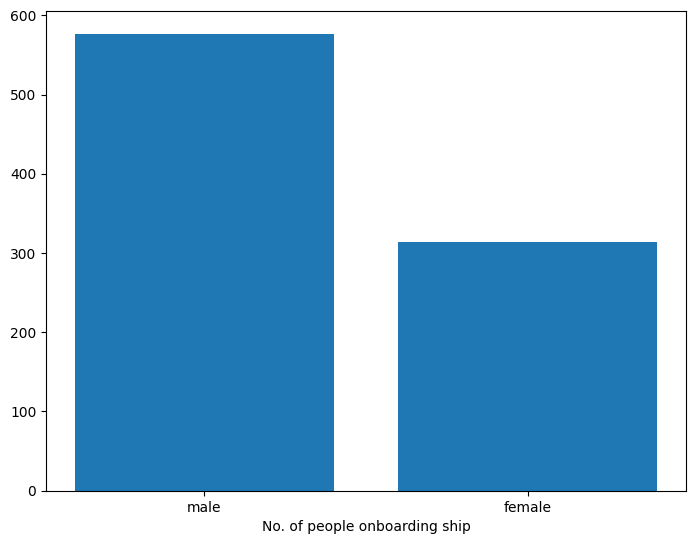

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['male','female']
index=[577,314]
ax.bar(gender,index)
plt.xlabel("gender")
plt.xlabel("No. of people onboarding ship")
plt.show()

In [38]:
alive = len(train[train['Survived']==1])

In [39]:
dead=len(train[train['Survived']==0])

In [41]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.931818
male,0.431579


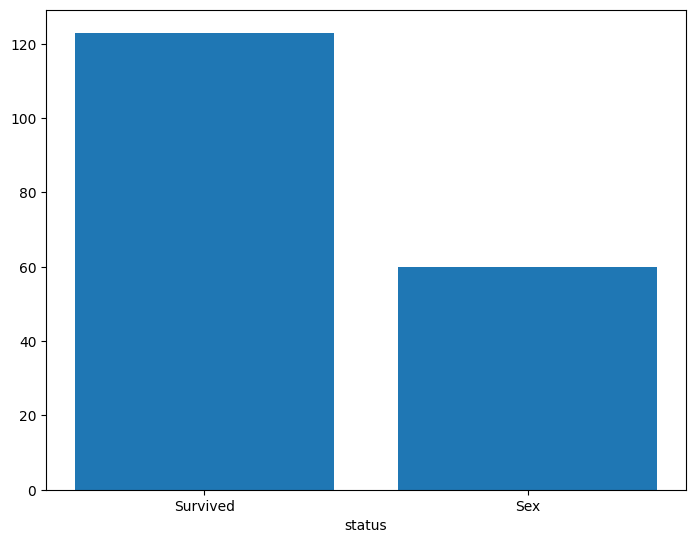

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Sex']
ind=[alive,dead]
ax.bar(status,ind)
plt.xlabel("status")
plt.show()

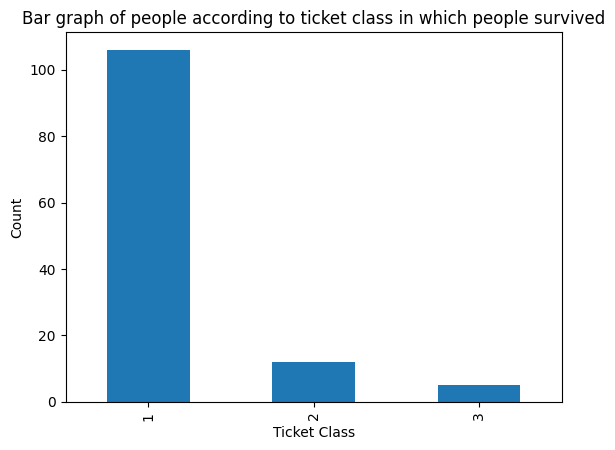

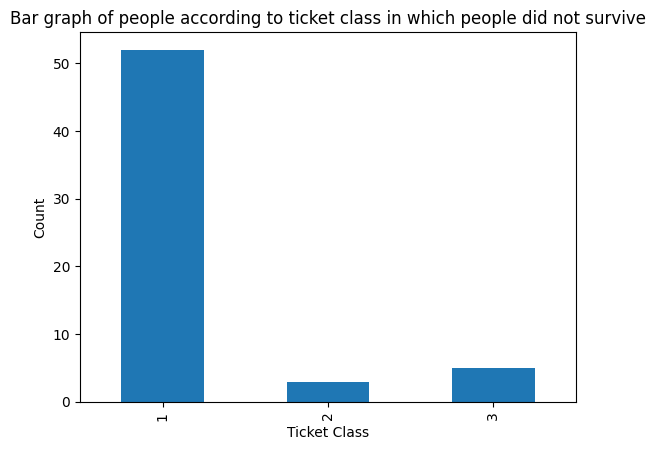

In [49]:
import matplotlib.pyplot as plt

plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')
plt.xlabel('Ticket Class')
plt.ylabel('Count')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people did not survive')
plt.xlabel('Ticket Class')
plt.ylabel('Count')

plt.show()


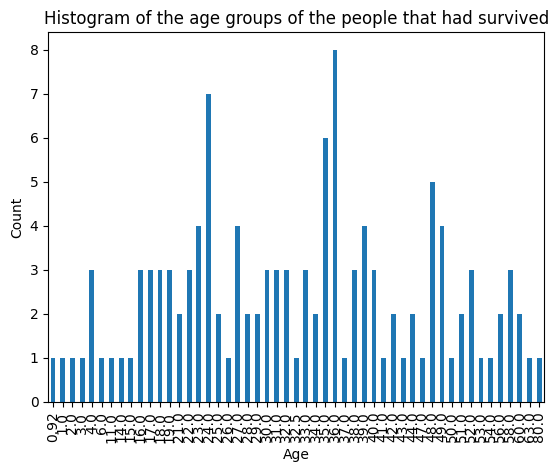

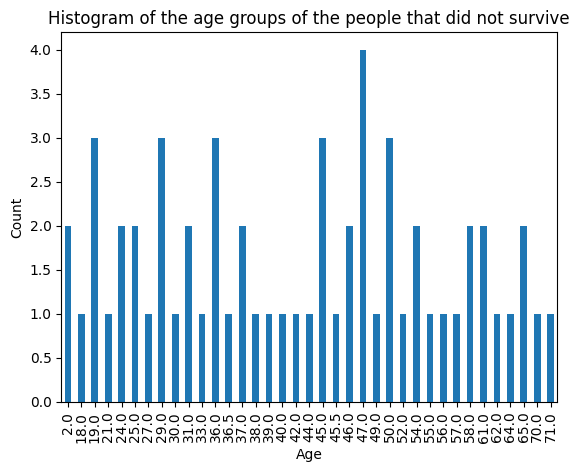

In [52]:
import matplotlib.pyplot as plt

plt.figure(1)
train.loc[train['Survived'] == 1, 'Age'].value_counts().sort_index().plot.bar()
plt.title('Histogram of the age groups of the people that had survived')
plt.xlabel('Age')
plt.ylabel('Count')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Age'].value_counts().sort_index().plot.bar()
plt.title('Histogram of the age groups of the people that did not survive')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


In [53]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
2,2,0.833333
1,1,0.734375
3,3,0.666667
0,0,0.627273


In [54]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
1,2,0.800000
0,1,0.670886
2,3,0.500000


In [55]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.92,1.000000
1,1.00,1.000000
2,2.00,0.333333
3,3.00,1.000000
4,4.00,1.000000
...,...,...
58,64.00,0.000000
59,65.00,0.000000
60,70.00,0.000000
61,71.00,0.000000


In [56]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.738462
2,S,0.637931
1,Q,0.500000


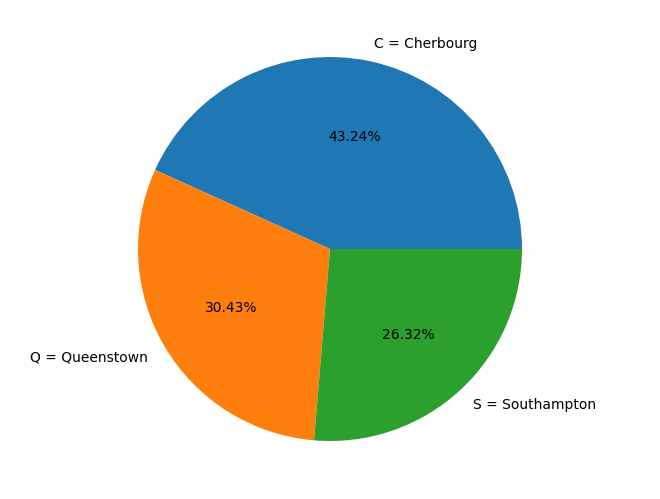

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [58]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [7]:
import pandas as pd

# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop 'Ticket' column
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [8]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [9]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [11]:
import pandas as pd

# Sample data (replace this with your actual DataFrame)
data = {
    'Age': [22, 25, None, 28, None, 35],
    'Survived': [1, 0, 1, 0, 1, 0]
}
train = pd.DataFrame(data)

# Fill missing values in 'Age' column with the median age
train['Age'] = train['Age'].fillna(train['Age'].median())

print(train)


    Age  Survived
0  22.0         1
1  25.0         0
2  26.5         1
3  28.0         0
4  26.5         1
5  35.0         0


In [12]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [16]:
import pandas as pd

# Sample data (replace this with your actual DataFrame)
data = {
    'Age': [22, 25, None, 28, None, 35],
    'Survived': [1, 0, 1, 0, 1, 0],
    'Embarked': ['S', 'C', 'Q', None, 'S', 'C']
}
train = pd.DataFrame(data)

# Create a DataFrame X which is a slice of train
X = train[['Age', 'Survived', 'Embarked']].copy()

# Check if 'Embarked' column exists in train
if 'Embarked' in train.columns:
    # Fill missing values in 'Embarked' column with the forward fill method
    X['Embarked'] = train['Embarked'].fillna(method='pad')
else:
    print("The 'Embarked' column does not exist in the train DataFrame.")

# Verify that the missing values have been filled
print(X)
print(X['Embarked'].isnull().sum())


    Age  Survived Embarked
0  22.0         1        S
1  25.0         0        C
2   NaN         1        Q
3  28.0         0        Q
4   NaN         1        S
5  35.0         0        C
0


In [17]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [19]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', 10, 'display.width', 1000)

# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the train DataFrame
print(train.head())

# Mapping dictionary for 'Sex' column
d = {'male': 0, 'female': 1}

# Create X DataFrame and include the 'Sex' column
X = train.copy()

# Apply the mapping to the 'Sex' column
X['Sex'] = X['Sex'].apply(lambda x: d[x])

# Display the first few rows of the modified 'Sex' column
print(X['Sex'].head())


   PassengerId  Survived  Pclass                                               Name     Sex  ...  Parch            Ticket     Fare Cabin  Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  ...      0         A/5 21171   7.2500   NaN         S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0          PC 17599  71.2833   C85         C
2            3         1       3                             Heikkinen, Miss. Laina  female  ...      0  STON/O2. 3101282   7.9250   NaN         S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0            113803  53.1000  C123         S
4            5         0       3                           Allen, Mr. William Henry    male  ...      0            373450   8.0500   NaN         S

[5 rows x 12 columns]
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [21]:
# Dictionary for mapping 'Embarked' column
e = {'C': 0, 'Q': 1, 'S': 2}

# Fill NaN values in 'Embarked' with the most frequent value ('S' in this case)
X['Embarked'] = X['Embarked'].fillna('S')

# Apply the mapping to the 'Embarked' column
X['Embarked'] = X['Embarked'].apply(lambda x: e[x])

# Display the first few rows of the modified 'Embarked' column
print(X['Embarked'].head())


0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [26]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [28]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [30]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [32]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7313432835820896


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[131  25]
 [ 47  65]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       156
           1       0.72      0.58      0.64       112

    accuracy                           0.73       268
   macro avg       0.73      0.71      0.71       268
weighted avg       0.73      0.73      0.73       268



In [34]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
